<a href="https://colab.research.google.com/github/SanjaySaatyaki/pytorch_4_ml_dl/blob/main/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed May 14 02:13:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.6.0+cu124


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision
from torchvision import datasets
from torchvision import transforms


In [4]:
train_data = torchvision.datasets.MNIST(root="data",
                                       train=True,
                                       transform= transforms.ToTensor(),
                                       download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 494kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.57MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.61MB/s]


In [5]:
test_data = torchvision.datasets.MNIST(root="data",
                                       train=False,
                                       transform=transforms.ToTensor(),
                                       download=True)

In [6]:
class_names = train_data.classes

## 6. Visualize at least 5 different samples of the MNIST training dataset.

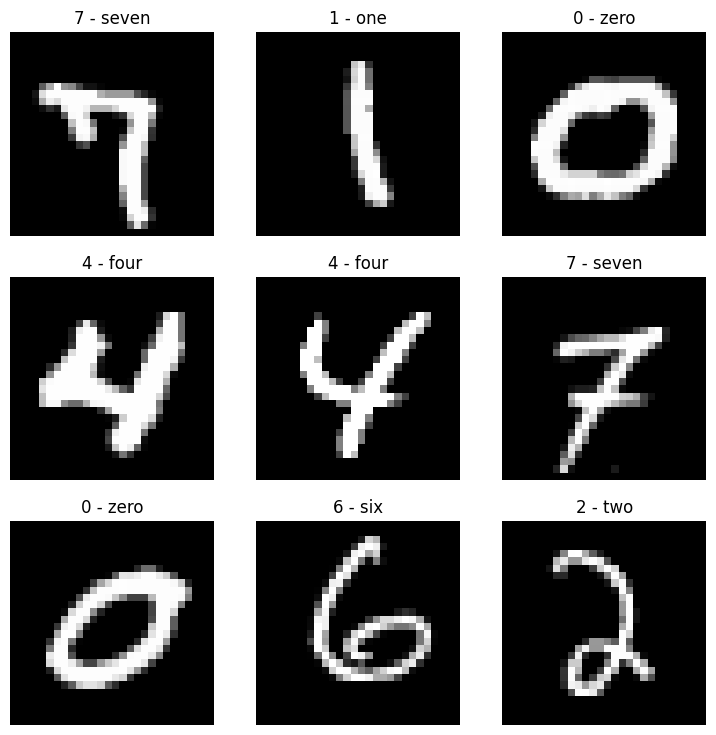

In [7]:
import matplotlib.pyplot as plt
import torch
fig =plt.figure(figsize=(9,9))
row =3
col =3
for i in range(1,row*col+1):
  random_idx = torch.randint(0,len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(row,col, i)
  plt.imshow(image.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [8]:
image.shape

torch.Size([1, 28, 28])

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [9]:
from torch.utils.data import DataLoader

train_data_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=32,shuffle=True)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [10]:
from torch import nn

class tiny_vvg(nn.Module):
  def __init__(self, in_shape, out_shape, hidden_units) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=in_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=out_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x


In [11]:
tiny_vvg_model = tiny_vvg(in_shape = 1, out_shape=len(class_names), hidden_units=10)

In [12]:
tiny_vvg_model

tiny_vvg(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [13]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [14]:
from torchmetrics import Accuracy

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=tiny_vvg_model.parameters(), lr=0.1)
accuracy = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [15]:
def train_step(model, data_loader, optimizer,loss_fn,accuracy_fn,target_device):
  train_loss, train_acc=0,0
  for batch,(X,y) in enumerate(data_loader):

    model.train()
    y_logits = model(X)
    loss = loss_fn(y_logits,y)
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)
    acc = accuracy_fn(y_pred,y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    train_loss += loss
    train_acc += acc

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss:{train_loss} | Train Acc: {train_acc}")


In [16]:
def test_step(model, data_loader,loss_fn, accuracy_fn, target_device):
  test_loss,test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      y_logits = model(X)

      y_preds = torch.softmax(y_logits,dim=1).argmax(dim=1)

      loss = loss_fn(y_logits,y)
      acc = accuracy_fn(y_preds, y)

      test_loss += loss
      test_acc +=acc
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  print(f"Test Loss: {test_loss} | Test Acc: {test_acc}")

In [17]:
test_image = torch.rand(size=(1,28,28)).unsqueeze(dim=0)
test_image.shape

torch.Size([1, 1, 28, 28])

In [18]:
torch.sum(torch.arange(0,10))

tensor(45)

In [19]:
tiny_vvg_model.eval()
with torch.inference_mode():
  logits = tiny_vvg_model(test_image)
y_pred = torch.softmax(logits,dim=1).argmax(dim=1)

y_pred_t = torch.softmax(logits,dim=1).argmax()
print(y_pred.shape)
print(y_pred)

print(y_pred_t)
print(y_pred_t.shape)

torch.Size([1])
tensor([3])
tensor(3)
torch.Size([])


In [20]:
from timeit import default_timer as timer
from tqdm.auto import tqdm


model_train_start_time = timer()
epochs = 5

for epoch in tqdm(range(epochs)):
    train_step(model=tiny_vvg_model,
               data_loader=train_data_loader,
               optimizer=optimizer,
               loss_fn=loss_fn,
               accuracy_fn=accuracy,
               target_device=device
               )
    test_step(model=tiny_vvg_model,
              data_loader=test_data_loader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy,
              target_device=device)


  0%|          | 0/5 [00:00<?, ?it/s]

Train loss:0.2917514741420746 | Train Acc: 0.9043166637420654
Test Loss: 0.0689198225736618 | Test Acc: 0.9778354167938232
Train loss:0.07441343367099762 | Train Acc: 0.9778167009353638
Test Loss: 0.05260394513607025 | Test Acc: 0.9819288849830627
Train loss:0.05699498578906059 | Train Acc: 0.9830333590507507
Test Loss: 0.04954076185822487 | Test Acc: 0.9848242402076721
Train loss:0.0478447824716568 | Train Acc: 0.9852666854858398
Test Loss: 0.04378074035048485 | Test Acc: 0.985223650932312
Train loss:0.041900575160980225 | Train Acc: 0.9867333173751831
Test Loss: 0.045913636684417725 | Test Acc: 0.9848242402076721


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

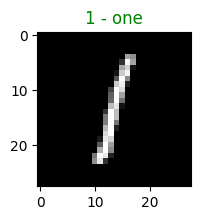

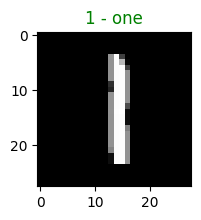

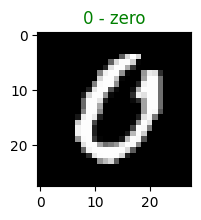

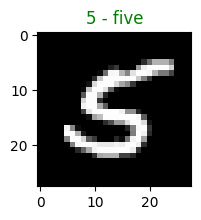

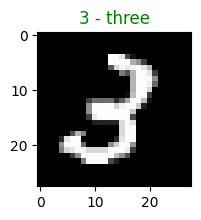

In [32]:
def make_predictions(no_of_pred, model, data):

  for i in range(no_of_pred):
    rand_idx = torch.randint(low=0,high=len(data),size=[1]).item()
    img, label = data[rand_idx]
    plt.figure(figsize=(2,2))
    plt.imshow(img.squeeze(),cmap="gray")
    y_pred = model(img.unsqueeze(dim=0)).softmax(dim=1).argmax(dim=1)
    if class_names[y_pred] == class_names[label]:
      plt.title(class_names[label], color="green")
    else:
      plt.title(f"Predicted Class:{class_names[y_pred]} Actual Class:{class_names[label]}", color="red")

make_predictions(5, tiny_vvg_model, train_data)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?